<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

## *Data Science Unit 4 Sprint 2 Assignment 2*

# Document Representations: Bag-Of-Words

In [ ]:
import re
import string

!pip install -U nltk

import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import sent_tokenize # Sentence Tokenizer
from nltk.tokenize import word_tokenize # Word Tokenizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.probability import FreqDist

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

Requirement already up-to-date: nltk in /usr/local/lib/python3.6/dist-packages (3.4)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# 1) (optional) Scrape 100 Job Listings that contain the title "Data Scientist" from indeed.com

At a minimum your final dataframe of job listings should contain
- Job Title
- Job Description

If you choose to not to scrape the data, there is a CSV with outdated data in the directory. Remeber, if you scrape Indeed, you're helping yourself find a job. ;)

In [40]:
import pandas as pd

listings = pd.read_csv('job_listings.csv')

def clean_listings(df):
    df = df.copy()
    df.description = df.description.apply(lambda x: x[1:].replace('\\n','').replace('"', ' ').replace("'", ' ').replace(':', ' '))
    def clean_html(item):
        item = re.sub('<[^<]+?>', '', str(item))
        return item
    df.description = df.description.apply(clean_html)
    return df

listings = clean_listings(listings)

In [41]:
listings.head()

,Unnamed: 0,description,title
0,0,Job Requirements Conceptual understanding in ...,Data scientist
1,1,"Job DescriptionAs a Data Scientist 1, you wil...",Data Scientist I
2,2,As a Data Scientist you will be working on co...,Data Scientist - Entry Level
3,3,"$4,969 - $6,756 a monthContractUnder the gene...",Data Scientist
4,4,Location USA \xe2\x80\x93 multiple locations...,Data Scientist


## 2) Use Spacy to tokenize / clean the listings 

In [2]:
import spacy
from spacy.tokenizer import Tokenizer

nlp = spacy.load("en_core_web_md")

In [12]:
clean_html(listings.loc[0]['description'])

'b"Job Requirements:\\nConceptual understanding in Machine Learning models like Nai\\xc2\\xa8ve Bayes, K-Means, SVM, Apriori, Linear/ Logistic Regression, Neural, Random Forests, Decision Trees, K-NN along with hands-on experience in at least 2 of them\\nIntermediate to expert level coding skills in Python/R. (Ability to write functions, clean and efficient data manipulation are mandatory for this role)\\nExposure to packages like NumPy, SciPy, Pandas, Matplotlib etc in Python or GGPlot2, dplyr, tidyR in R\\nAbility to communicate Model findings to both Technical and Non-Technical stake holders\\nHands on experience in SQL/Hive or similar programming language\\nMust show past work via GitHub, Kaggle or any other published article\\nMaster\'s degree in Statistics/Mathematics/Computer Science or any other quant specific field.\\nApply Now"'

In [42]:
import re
tokenizer = Tokenizer(nlp.vocab)

tokens = []
for doc in tokenizer.pipe(listings['description'], batch_size=500):
    doc_tokens = [token.text for token in doc]
    tokens.append(doc_tokens)
listings['tokens'] = tokens

In [43]:
listings.head()

,Unnamed: 0,description,title,tokens
0,0,Job Requirements Conceptual understanding in ...,Data scientist,"[ , Job, Requirements, Conceptual, understandi..."
1,1,"Job DescriptionAs a Data Scientist 1, you wil...",Data Scientist I,"[ , Job, DescriptionAs, a, Data, Scientist, 1,..."
2,2,As a Data Scientist you will be working on co...,Data Scientist - Entry Level,"[ , As, a, Data, Scientist, you, will, be, wor..."
3,3,"$4,969 - $6,756 a monthContractUnder the gene...",Data Scientist,"[ , $4,969, -, $6,756, a, monthContractUnder, ..."
4,4,Location USA \xe2\x80\x93 multiple locations...,Data Scientist,"[ , Location, , USA, \xe2\x80\x93, multiple, ..."


# 3) Use Scikit-Learn's CountVectorizer to get word counts for each listing.

In [72]:
from sklearn.feature_extraction.text import CountVectorizer
STOP_WORDS = nlp.Defaults.stop_words.union(['xe2', 'x80', 'x99s'])
corpus = listings['description']
vec = CountVectorizer(stop_words=STOP_WORDS).fit(corpus)
bag_of_words = vec.transform(corpus)
sum_words = bag_of_words.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in     vec.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)

In [73]:
words_freq[:20]

[('data', 4346),
 ('experience', 1384),
 ('business', 1172),
 ('work', 1049),
 ('team', 936),
 ('science', 922),
 ('learning', 881),
 ('analytics', 700),
 ('machine', 691),
 ('analysis', 619),
 ('models', 570),
 ('product', 570),
 ('statistical', 570),
 ('skills', 558),
 ('new', 529),
 ('solutions', 488),
 ('scientist', 482),
 ('help', 450),
 ('technical', 444),
 ('insights', 438)]

In [74]:
top_20_vals = [val[1] for val in words_freq[:20]]
top_20_keys = [val[0] for val in words_freq[:20]]
top_20 = pd.DataFrame(top_20_vals, index=top_20_keys)
top_20

,0
data,4346
experience,1384
business,1172
work,1049
team,936
science,922
learning,881
analytics,700
machine,691
analysis,619


# 4) Visualize the most common word counts

In [67]:
!pip install squarify

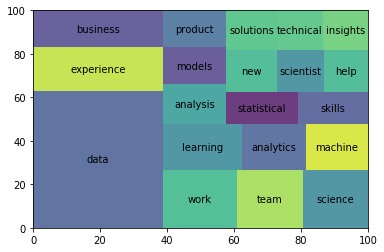

In [75]:
import squarify
import matplotlib.pyplot as plt

squarify.plot(sizes=top_20[0], label=top_20.index, alpha=.8 )
plt.show()

 # 5) Use Scikit-Learn's tfidfVectorizer to get a TF-IDF feature matrix

In [77]:
from sklearn.feature_extraction.text import TfidfVectorizer
data = corpus
# Instantiate vectorizer object
tfidf = TfidfVectorizer(stop_words=STOP_WORDS, max_features=5000)

# Create a vocabulary and get word counts per document
dtm = tfidf.fit_transform(data)
#dtm = tfidf.transform(new_data)

# Print word counts

# Get feature names to use as dataframe column headers

# View Feature Matrix as DataFrame
docs = pd.DataFrame(dtm.todense(), columns = tfidf.get_feature_names())
docs.head()

,000,03,04,06366,10,100,1000,1001,105,1079302who,...,young,youyou,yrs,zenreach,zero,zeus,zf,zillow,zuckerberg,zurich
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


 # 6) Create a NearestNeighbor Model. Write the description of your ideal datascience job and query your job listings. 

In [78]:
from sklearn.neighbors import NearestNeighbors

nn = NearestNeighbors(n_neighbors=5, algorithm='ball_tree')

# Fit on TF-IDF Vectors
nn.fit(dtm.todense())

ideal_job_desc = ["""Work with SQL. Build models. Read documentation."""]

new = tfidf.transform(ideal_job_desc)

nn.kneighbors(new.todense())

(array([[1.30948386, 1.31226939, 1.32664157, 1.34922366, 1.35406073]]),
 array([[329, 274,  51, 121, 194]], dtype=int64))

In [80]:
print(data[329], '\n')
print(data[274])
print(data[51])

 Company OverviewThe complex ecosystem of bacteria that comprise our gut microbiome are inextricablytied to the overall quality of human health. Comet Medicine is a new start-up companypoised to leverage the power of active microbial communities to address high unmetmedical needs. Our approach lies at the intersection of microbiology, chemistry, andgenomics and uniquely enables us to harness the power of the microbiome and definethe potential of this new therapeutic modality.Comet was founded by two leading academics in the microbiome field (StanfordProfessors Michael Fischbach and Dylan Dodd) as well as Venrock, one of the oldestventure capital funds in the United States.Description of RoleWe are currently seeking an experienced and highly motivated Data Scientist to build andoversee the internal bioinformatics/metagenomics platform at Comet. A core focus is theanalysis of metagenomic data from communities of gut bacteria, as well as thedevelopment, evaluation and implementation of bi

## Stretch Goals

 - Try different visualizations for words and frequencies - what story do you want to tell with the data?
 - Scrape Job Listings for the job title "Data Analyst". How do these differ from Data Scientist Job Listings
 - Try and identify requirements for experience specific technologies that are asked for in the job listings. How are those distributed among the job listings?
 - Use a clustering algorithm to cluster documents by their most important terms. Do the clusters reveal any common themes?
  - **Hint:** K-means might not be the best algorithm for this. Do a little bit of research to see what might be good for this. Also, remember that algorithms that depend on Euclidean distance break down with high dimensional data.